In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_epochs=5
batch_size=4
learning_rate=0.001


In [3]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create the testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create the training data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create the testing data loader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:13<00:00, 12807545.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [6]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.imshow()


In [7]:
dataiter=iter(train_loader)
images,labels=next(dataiter)


TypeError: ignored

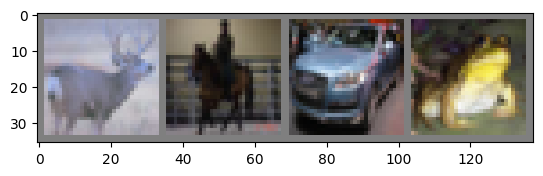

In [8]:
imshow(torchvision.utils.make_grid(images))



In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [11]:
model=ConvNet()

In [12]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


In [19]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # You don't need to manually assign images and labels to themselves.
        # Remove these lines:
        # images = images
        # labels = labels

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

# Saving the trained model
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]

    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {acc:.2f}%')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of class {i}: {acc:.2f}%')


Epoch [1/5], Step [2000/12500], Loss: 1.6764
Epoch [1/5], Step [4000/12500], Loss: 1.4281
Epoch [1/5], Step [6000/12500], Loss: 1.2350
Epoch [1/5], Step [8000/12500], Loss: 2.0430
Epoch [1/5], Step [10000/12500], Loss: 0.9921
Epoch [1/5], Step [12000/12500], Loss: 1.0011
Epoch [2/5], Step [2000/12500], Loss: 1.1348
Epoch [2/5], Step [4000/12500], Loss: 2.0685
Epoch [2/5], Step [6000/12500], Loss: 1.4009
Epoch [2/5], Step [8000/12500], Loss: 1.6621
Epoch [2/5], Step [10000/12500], Loss: 2.0740
Epoch [2/5], Step [12000/12500], Loss: 1.1330
Epoch [3/5], Step [2000/12500], Loss: 1.1573
Epoch [3/5], Step [4000/12500], Loss: 2.1923
Epoch [3/5], Step [6000/12500], Loss: 1.7500
Epoch [3/5], Step [8000/12500], Loss: 0.4522
Epoch [3/5], Step [10000/12500], Loss: 2.1267
Epoch [3/5], Step [12000/12500], Loss: 1.7139
Epoch [4/5], Step [2000/12500], Loss: 0.9302
Epoch [4/5], Step [4000/12500], Loss: 1.2602
Epoch [4/5], Step [6000/12500], Loss: 1.3503
Epoch [4/5], Step [8000/12500], Loss: 0.4299
Epoc